# Data Exploration

In [167]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings('ignore')


In [168]:
trials = pd.read_csv('trials.csv', sep=',')

In [169]:
trials

trial dataset                      clustering              lm   k  \
0           0      D4   ConnectedComponentsClustering  sdistilroberta  23   
1           1      D4         UniqueMappingClustering             st5   1   
2           2      D4   ConnectedComponentsClustering             st5  51   
3           3      D4   ConnectedComponentsClustering          smpnet  75   
4           4      D4         UniqueMappingClustering         sminilm  25   
...       ...     ...                             ...             ...  ..   
130345   8905      D5  KiralyMSMApproximateClustering         sminilm  86   
130346   8906      D5             BestMatchClustering      sent_glove  41   
130347   8907      D5   ConnectedComponentsClustering  sdistilroberta  30   
130348   8908      D5   ConnectedComponentsClustering         sminilm  84   
130349   8909      D5  KiralyMSMApproximateClustering  sdistilroberta  91   

        threshold     sampler  seed  precision   recall       f1   runtime  
0        0.557313         qmc    16   100.0000   4.8112   9.1806  0.758500  
1        0.050000         qmc    16    98.7794  98.2464  98.5122  0.391800  
2        0.500000         qmc    16     0.0000   0.0000   0.0000  0.795400  
3        0.275000         qmc    16     0.0000   0.0000   0.0000  1.009000  
4        0.725000         qmc    16    97.9100  96.8975  97.4011  0.491500  
...           ...         ...   ...        ...      ...      ...       ...  
130345   0.100000  gridsearch    42    58.0952  86.7886  69.6007  6.032823  
130346   0.350000  gridsearch    42    21.9088  42.2256  28.8492  2.586984  
130347   0.600000  gridsearch    42    77.9172  31.5549  44.9186  2.703562  
130348   0.850000  gridsearch    42    90.0875  15.7012  26.7417  3.940058  
130349   0.800000  gridsearch    42    85.3061  10.6199  18.8884  3.254573  

[130350 rows x 12 columns]

In [170]:
trials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130350 entries, 0 to 130349
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   trial       130350 non-null  int64  
 1   dataset     130350 non-null  object 
 2   clustering  130350 non-null  object 
 3   lm          130350 non-null  object 
 4   k           130350 non-null  int64  
 5   threshold   130350 non-null  float64
 6   sampler     130350 non-null  object 
 7   seed        130350 non-null  int64  
 8   precision   130350 non-null  float64
 9   recall      130350 non-null  float64
 10  f1          130350 non-null  float64
 11  runtime     130350 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 11.9+ MB


In [171]:
trials.describe()

trial              k      threshold           seed  \
count  130350.000000  130350.000000  130350.000000  130350.000000   
mean     3050.227848      50.236578       0.485392     374.025316   
std      2963.393287      28.518306       0.259495     996.973638   
min         0.000000       1.000000       0.050000      16.000000   
25%        28.000000      25.000000       0.250000      42.000000   
50%      2392.000000      50.000000       0.500000      42.000000   
75%      5651.000000      75.000000       0.700000      64.000000   
max      8909.000000     100.000000       0.949883    4096.000000   

           precision         recall             f1        runtime  
count  130350.000000  130350.000000  130350.000000  130350.000000  
mean       51.769822      50.671653      43.034023       5.218241  
std        31.835929      34.118306      29.350243       7.289713  
min         0.000000       0.000000       0.000000       0.044500  
25%        25.958700      17.806100      19.927500       1.185244  
50%        52.675400      57.164600      42.409600       2.157566  
75%        82.511900      82.283100      63.895500       5.830350  
max       100.000000      98.876400      98.512200      72.010000

In [172]:
# Count exact duplicates
trials.duplicated().sum()

214

In [173]:
trials.drop_duplicates(inplace=True)

In [174]:
trials.duplicated().sum()

0

In [175]:
trials.isnull().sum()

trial         0
dataset       0
clustering    0
lm            0
k             0
threshold     0
sampler       0
seed          0
precision     0
recall        0
f1            0
runtime       0
dtype: int64

# Join with Dataset specs

In [176]:
dataset_specs = pd.read_csv('dataset_specs.csv', sep=',')

Join

In [177]:
# join the datasets in 'dataset' column
trials = pd.merge(trials, dataset_specs, on='dataset')

In [178]:
trials

trial dataset                      clustering              lm   k  \
0           0      D4   ConnectedComponentsClustering  sdistilroberta  23   
1           1      D4         UniqueMappingClustering             st5   1   
2           2      D4   ConnectedComponentsClustering             st5  51   
3           3      D4   ConnectedComponentsClustering          smpnet  75   
4           4      D4         UniqueMappingClustering         sminilm  25   
...       ...     ...                             ...             ...  ..   
130131   8905      D5  KiralyMSMApproximateClustering         sminilm  86   
130132   8906      D5             BestMatchClustering      sent_glove  41   
130133   8907      D5   ConnectedComponentsClustering  sdistilroberta  30   
130134   8908      D5   ConnectedComponentsClustering         sminilm  84   
130135   8909      D5  KiralyMSMApproximateClustering  sdistilroberta  91   

        threshold     sampler  seed  precision   recall  ...  \
0        0.557313         qmc    16   100.0000   4.8112  ...   
1        0.050000         qmc    16    98.7794  98.2464  ...   
2        0.500000         qmc    16     0.0000   0.0000  ...   
3        0.275000         qmc    16     0.0000   0.0000  ...   
4        0.725000         qmc    16    97.9100  96.8975  ...   
...           ...         ...   ...        ...      ...  ...   
130131   0.100000  gridsearch    42    58.0952  86.7886  ...   
130132   0.350000  gridsearch    42    21.9088  42.2256  ...   
130133   0.600000  gridsearch    42    77.9172  31.5549  ...   
130134   0.850000  gridsearch    42    90.0875  15.7012  ...   
130135   0.800000  gridsearch    42    85.3061  10.6199  ...   

        NumberOfDistinctValues  NumberOfNameValuePairs  \
0                         6592                   19626   
1                         6592                   19626   
2                         6592                   19626   
3                         6592                   19626   
4                         6592                   19626   
...                        ...                     ...   
130131                   13624                   45055   
130132                   13624                   45055   
130133                   13624                   45055   
130134                   13624                   45055   
130135                   13624                   45055   

        AverageNVPairsPerEntity  AverageDistinctValuesPerEntity  \
0                          4.00                            1.34   
1                          4.00                            1.34   
2                          4.00                            1.34   
3                          4.00                            1.34   
4                          4.00                            1.34   
...                         ...                             ...   
130131                     4.03                            1.22   
130132                     4.03                            1.22   
130133                     4.03                            1.22   
130134                     4.03                            1.22   
130135                     4.03                            1.22   

        AverageNVpairsPerAttribute  AverageDistinctValuesPerAttribute  \
0                           4906.5                            1648.00   
1                           4906.5                            1648.00   
2                           4906.5                            1648.00   
3                           4906.5                            1648.00   
4                           4906.5                            1648.00   
...                            ...                                ...   
130131                      1217.7                             368.22   
130132                      1217.7                             368.22   
130133                      1217.7                             368.22   
130134                      1217.7                             368.22   
130135   

In [179]:
trials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130136 entries, 0 to 130135
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   trial                              130136 non-null  int64  
 1   dataset                            130136 non-null  object 
 2   clustering                         130136 non-null  object 
 3   lm                                 130136 non-null  object 
 4   k                                  130136 non-null  int64  
 5   threshold                          130136 non-null  float64
 6   sampler                            130136 non-null  object 
 7   seed                               130136 non-null  int64  
 8   precision                          130136 non-null  float64
 9   recall                             130136 non-null  float64
 10  f1                                 130136 non-null  float64
 11  runtime                            1301

## Keep Features needed

In [180]:
features = ['clustering', 'lm', 'k', 'threshold', 'InputEntityProfiles', 'NumberOfAttributes', 'NumberOfDistinctValues', 
            'NumberOfNameValuePairs', 'AverageNVPairsPerEntity', 'AverageDistinctValuesPerEntity', 
            'AverageNVpairsPerAttribute', 'AverageDistinctValuesPerAttribute', 'NumberOfMissingNVpairs', 
            'AverageValueLength', 'AverageValueTokens', 'MaxValuesPerEntity']


In [181]:
trials = trials[features + ['f1', 'dataset']]

Drop F1 == 0

In [182]:
# count rows with f1 == 0 total
trials[trials['f1'] == 0].count()

clustering                           14496
lm                                   14496
k                                    14496
threshold                            14496
InputEntityProfiles                  14496
NumberOfAttributes                   14496
NumberOfDistinctValues               14496
NumberOfNameValuePairs               14496
AverageNVPairsPerEntity              14496
AverageDistinctValuesPerEntity       14496
AverageNVpairsPerAttribute           14496
AverageDistinctValuesPerAttribute    14496
NumberOfMissingNVpairs               14496
AverageValueLength                   14496
AverageValueTokens                   14496
MaxValuesPerEntity                   14496
f1                                   14496
dataset                              14496
dtype: int64

In [183]:
bef = len(trials)
trials = trials[trials['f1']!=0]
print("Dropped", bef - len(trials), "rows with f1 == 0")

Dropped 14496 rows with f1 == 0


# Split in train and test

In [184]:
dataset = 'D1'

data = trials
# TEST ON dataset = 'D1'
testD = data[data['dataset']==dataset]

# TRAIN ON dataset != 'D1'
trainD = data[data['dataset']!=dataset]

# Explore dataset with visualizations

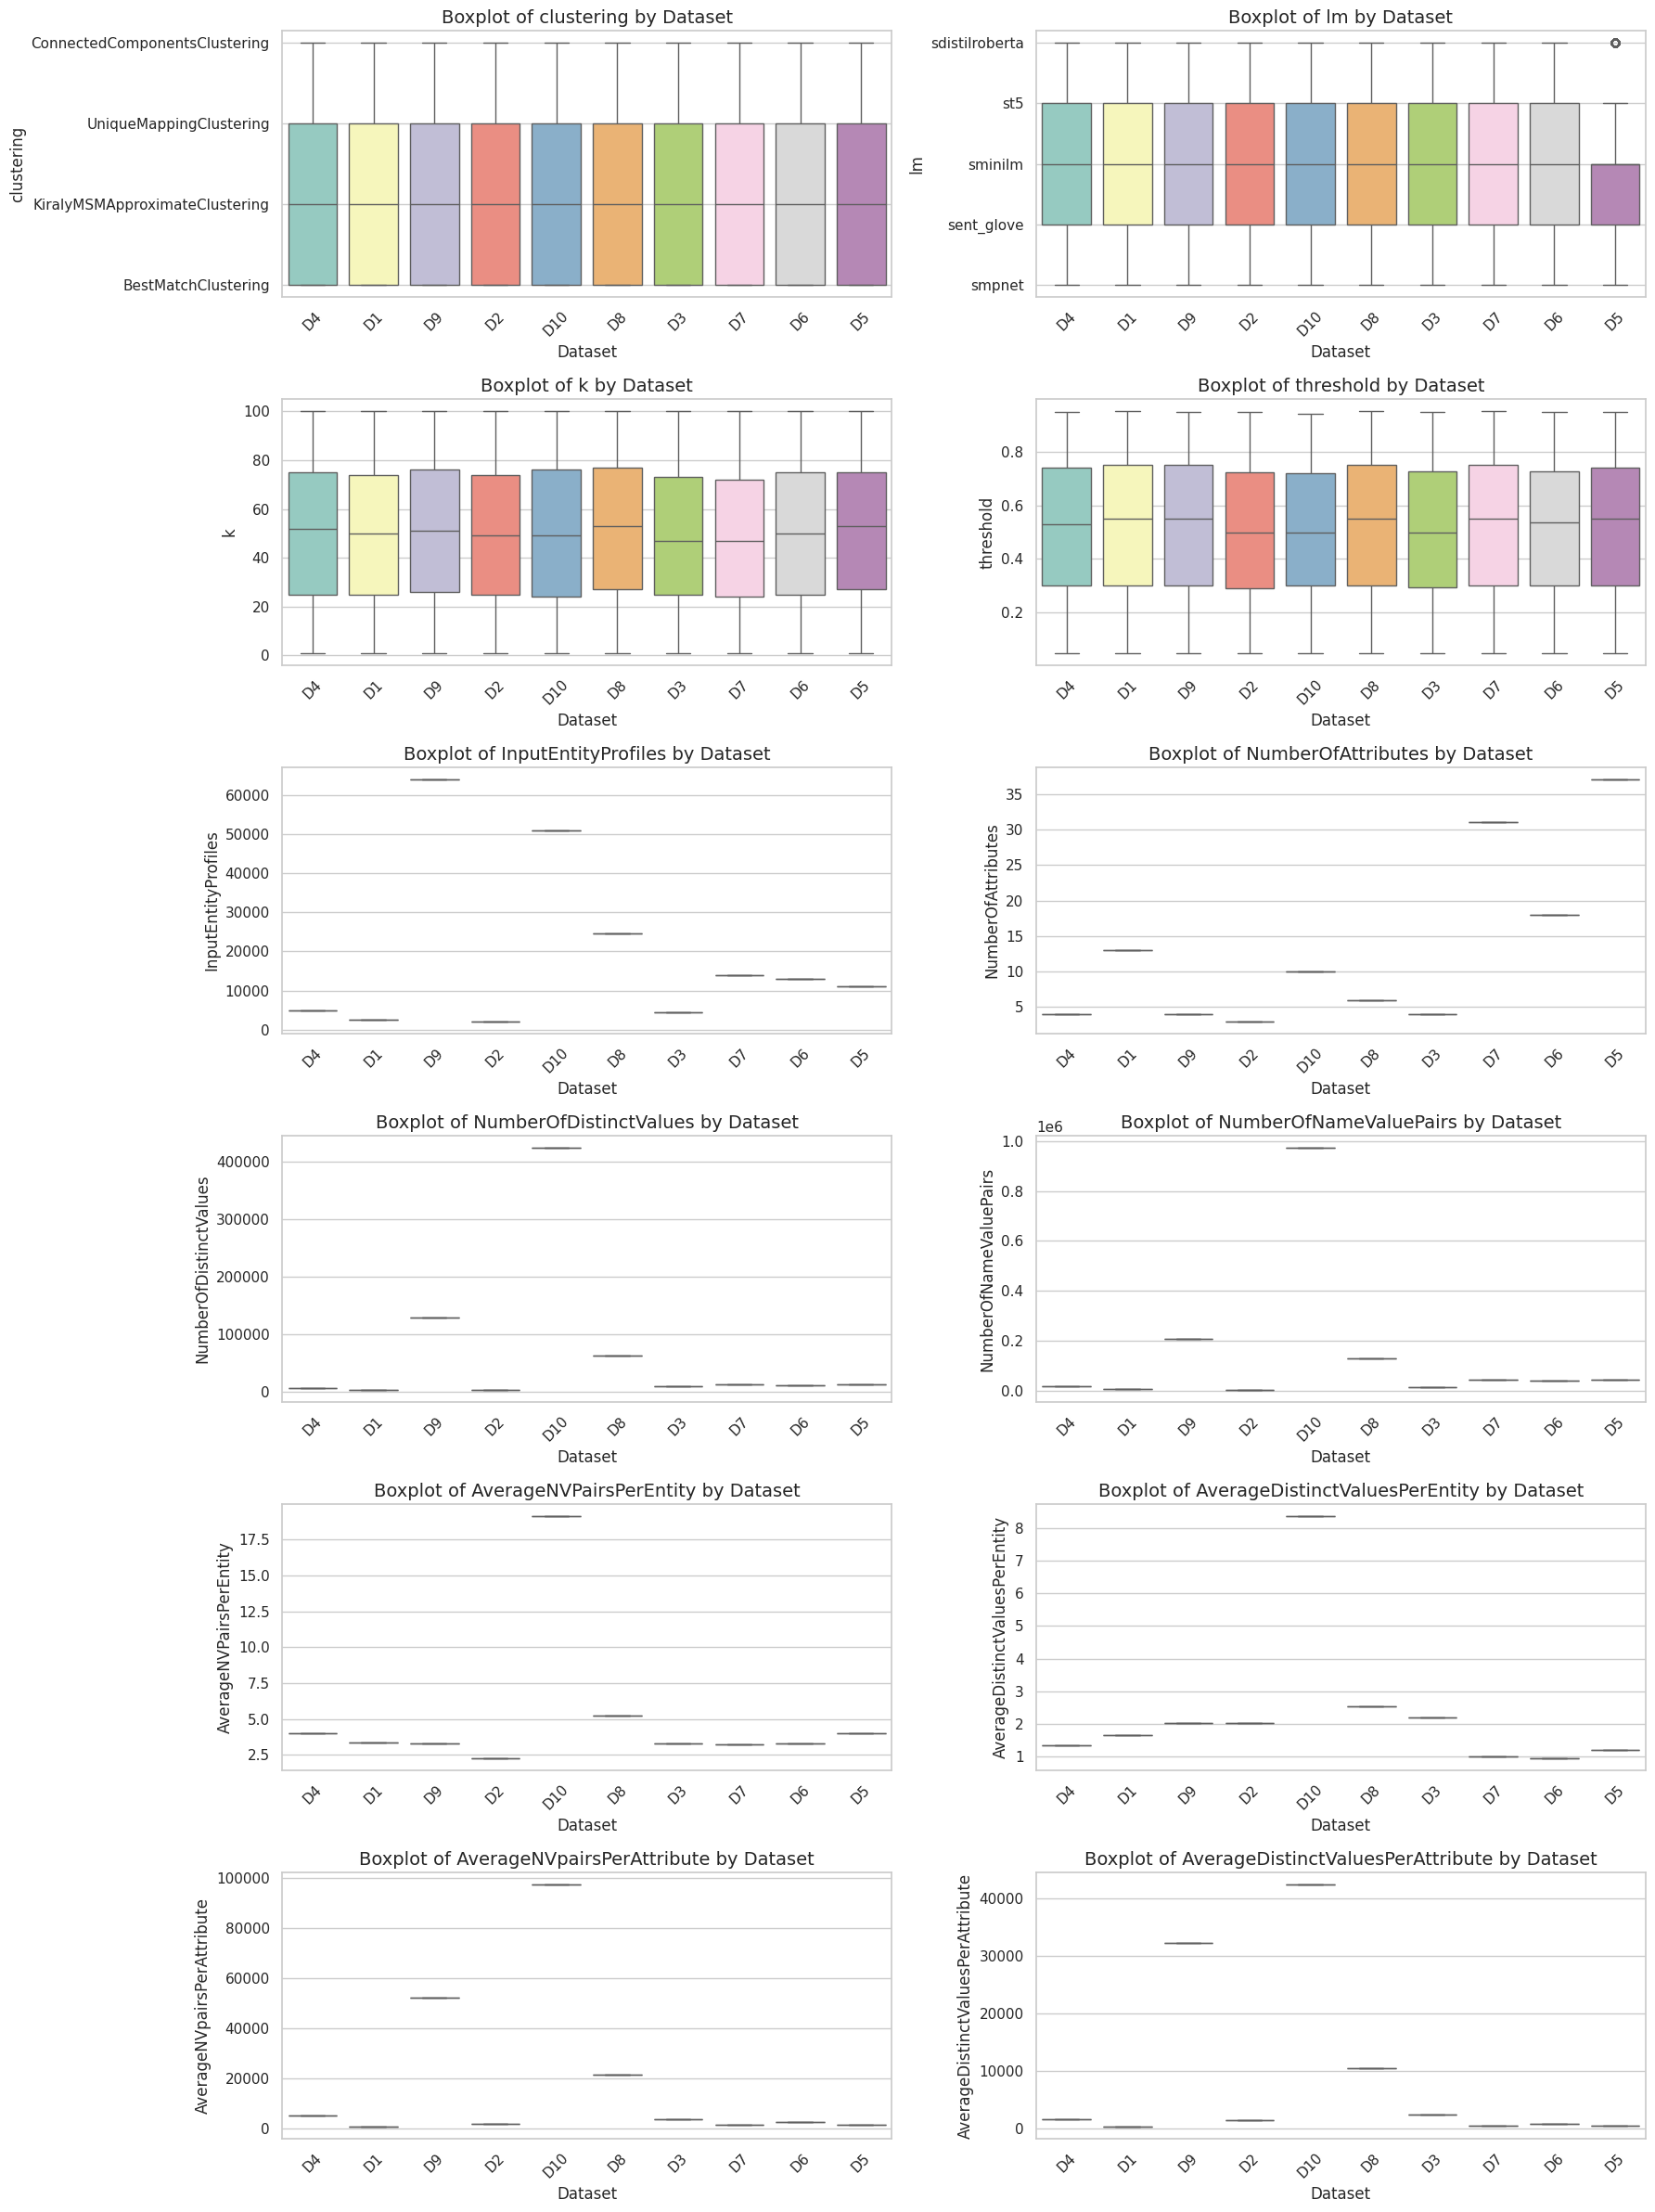

In [185]:
# Create a figure to hold the grouped boxplots
fig, axes = plt.subplots(6, 2, figsize=(18, 24))  # Adjust the layout to accommodate all plots
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Plotting grouped boxplots for each variable
for ax, var in zip(axes, features):
    sns.boxplot(x='dataset', y=var, data=data, ax=ax, palette='Set3')
    ax.set_title(f'Boxplot of {var} by Dataset', fontsize=14)
    ax.set_xlabel('Dataset', fontsize=12)
    ax.set_ylabel(var, fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

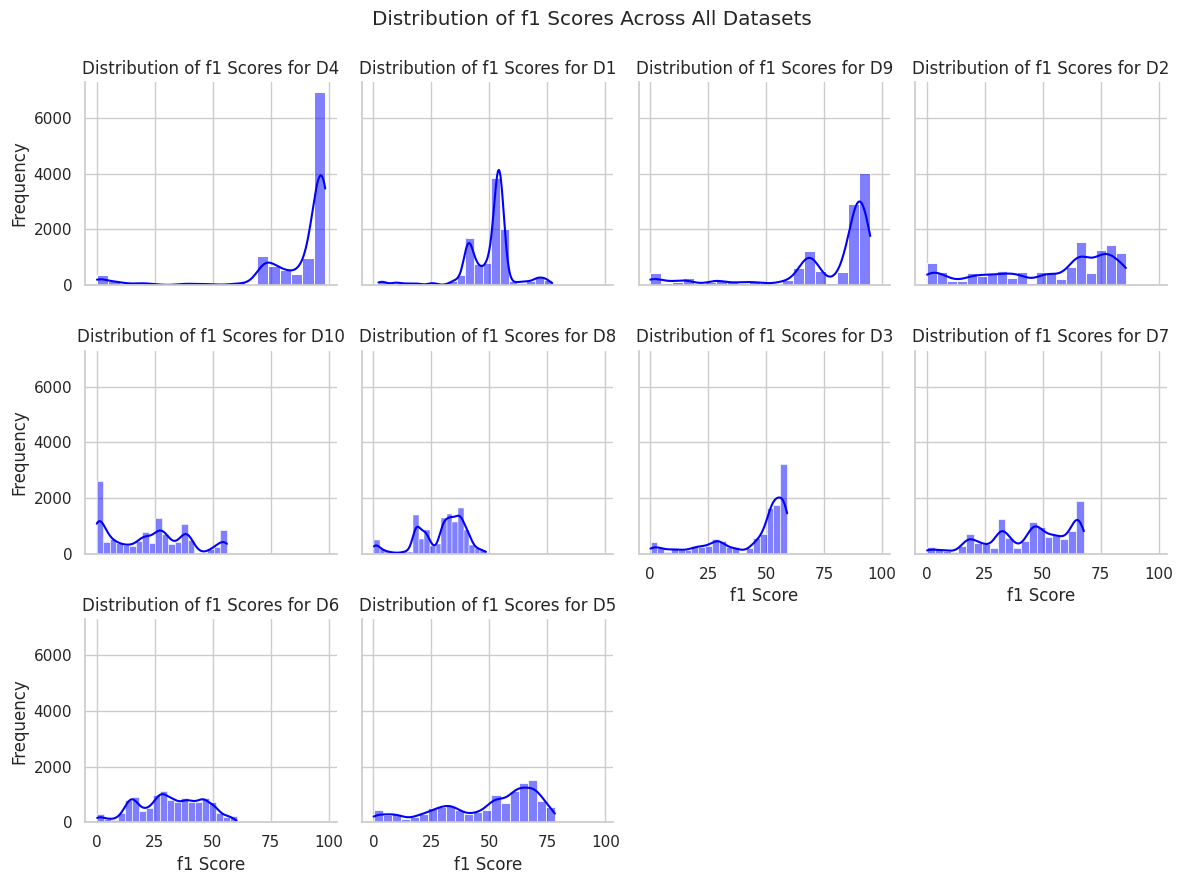

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a FacetGrid that separates the data by the 'dataset' column
g = sns.FacetGrid(data, col="dataset", col_wrap=4, height=3)
g.map(sns.histplot, "f1", bins=20, kde=True, color='blue')

# Add titles and labels
g.set_titles('Distribution of f1 Scores for {col_name}')
g.set_axis_labels('f1 Score', 'Frequency')

# Adjust the layout
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of f1 Scores Across All Datasets')

# Show the plots
plt.show()

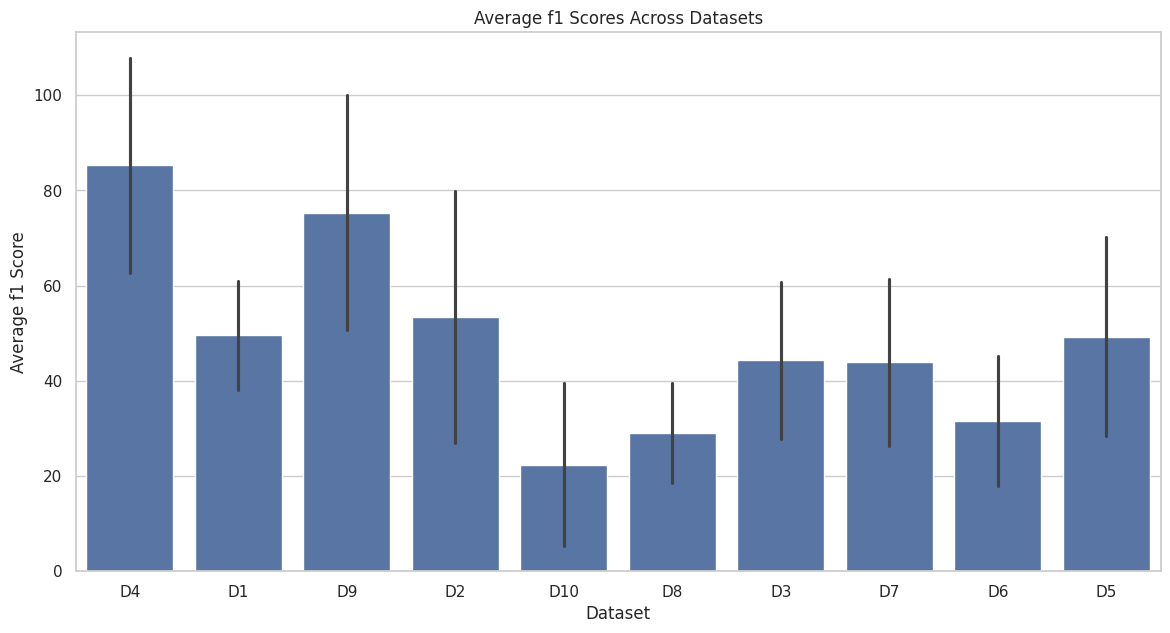

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure with specified size
plt.figure(figsize=(14, 7))

# Plot the average f1 scores across datasets with a barplot
sns.barplot(x='dataset', y='f1', data=data,  ci='sd')  # ci='sd' shows the standard deviation
plt.title('Average f1 Scores Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Average f1 Score')

plt.show()

In [188]:
sorted_trials = trials.sort_values('dataset', ascending=True)
sorted_trials

clustering              lm   k  threshold  \
19465  KiralyMSMApproximateClustering          smpnet  83       0.60   
17239   ConnectedComponentsClustering         sminilm  55       0.80   
17238         UniqueMappingClustering         sminilm  70       0.55   
17237             BestMatchClustering         sminilm   3       0.75   
17236         UniqueMappingClustering         sminilm  78       0.05   
...                               ...             ...  ..        ...   
34613         UniqueMappingClustering  sdistilroberta  50       0.45   
34612  KiralyMSMApproximateClustering          smpnet  58       0.50   
34611             BestMatchClustering      sent_glove  55       0.45   
34609  KiralyMSMApproximateClustering  sdistilroberta  71       0.05   
38708  KiralyMSMApproximateClustering             st5  87       0.40   

       InputEntityProfiles  NumberOfAttributes  NumberOfDistinctValues  \
19465                 2595                  13                    4273   
17239                 2595                  13                    4273   
17238                 2595                  13                    4273   
17237                 2595                  13                    4273   
17236                 2595                  13                    4273   
...                    ...                 ...                     ...   
34613                63869                   4                  129067   
34612                63869                   4                  129067   
34611                63869                   4                  129067   
34609                63869                   4                  129067   
38708                63869                   4                  129067   

       NumberOfNameValuePairs  AverageNVPairsPerEntity  \
19465                    8649                     3.33   
17239                    8649                     3.33   
17238                    8649                     3.33   
17237                    8649                     3.33   
17236                    8649                     3.33   
...                       ...                      ...   
34613                  208065                     3.26   
34612                  208065                     3.26   
34611                  208065                     3.26   
34609                  208065                     3.26   
38708                  208065                     3.26   

       AverageDistinctValuesPerEntity  AverageNVpairsPerAttribute  \
19465                            1.65                      665.31   
17239                            1.65                      665.31   
17238                            1.65                      665.31   
17237                            1.65                      665.31   
17236                            1.65                      665.31   
...                               ...                         ...   
34613                            2.02                    52016.25   
34612                            2.02                    52016.25   
34611                            2.02                    52016.25   
34609                            2.02                    52016.25   
38708                            2.02                    52016.25   

       AverageDistinctValuesPerAttribute  NumberOfMissingNVpairs  \
19465                             328.69                  4326.0   
17239                             328.69                  4326.0   
17238                             328.69                  4326.0   
17237                             328.69                  4326.0   
17236                             328.69                  4326.0   
...                                  ...                     ...   
34613                           32266.75                 47411.0   
34612                           32266.75                 47411.0   
34611                           32266.75                 47411.0   
34609                           32266.75                 47411.0   

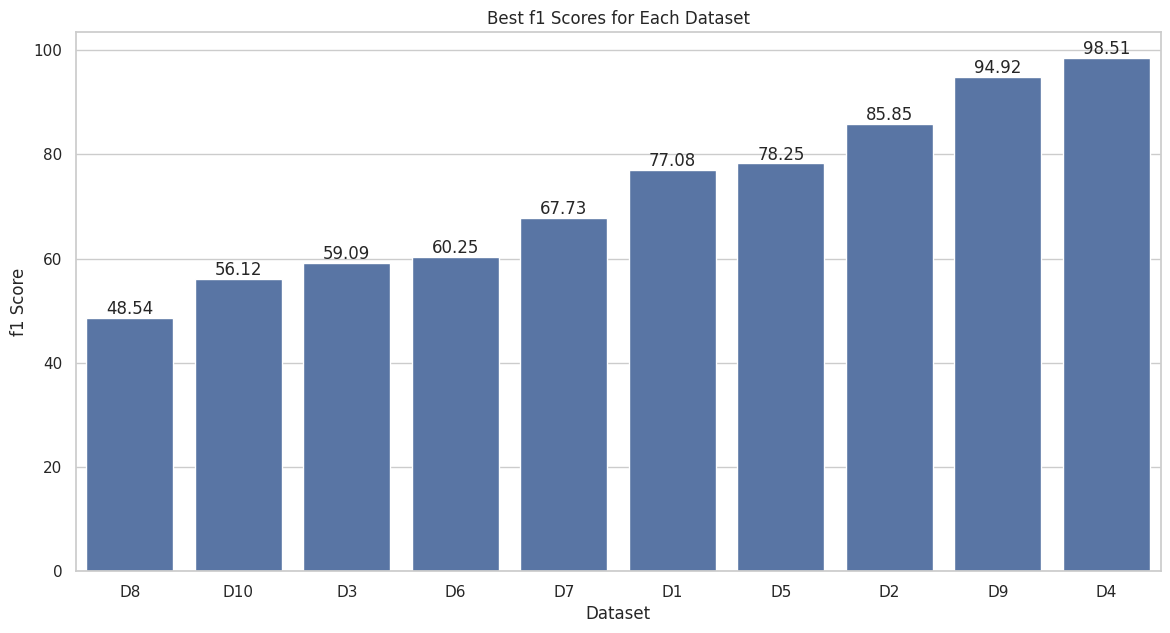

In [189]:
# plot best f1 per dataset for clustering, lm, threshold

# Get the best f1 score for each dataset
best_f1 = sorted_trials.groupby('dataset')['f1'].max()

# Get the corresponding row for each best f1 score
best_f1_rows = sorted_trials.loc[data.groupby('dataset')['f1'].idxmax()]

# Create a figure with specified size
plt.figure(figsize=(14, 7))

# Plot the best f1 scores for each dataset
sns.barplot(x='dataset', y='f1', data=best_f1_rows.sort_values('f1', ascending=True), ci=None)

# Add the best f1 score as text above each bar
for i, f1 in enumerate(sorted(best_f1)):
    plt.text(i, f1, f'{f1:.2f}', ha='center', va='bottom')

plt.title('Best f1 Scores for Each Dataset')
plt.xlabel('Dataset')
plt.ylabel('f1 Score')

plt.show()

# Visualize parameter importance for F1

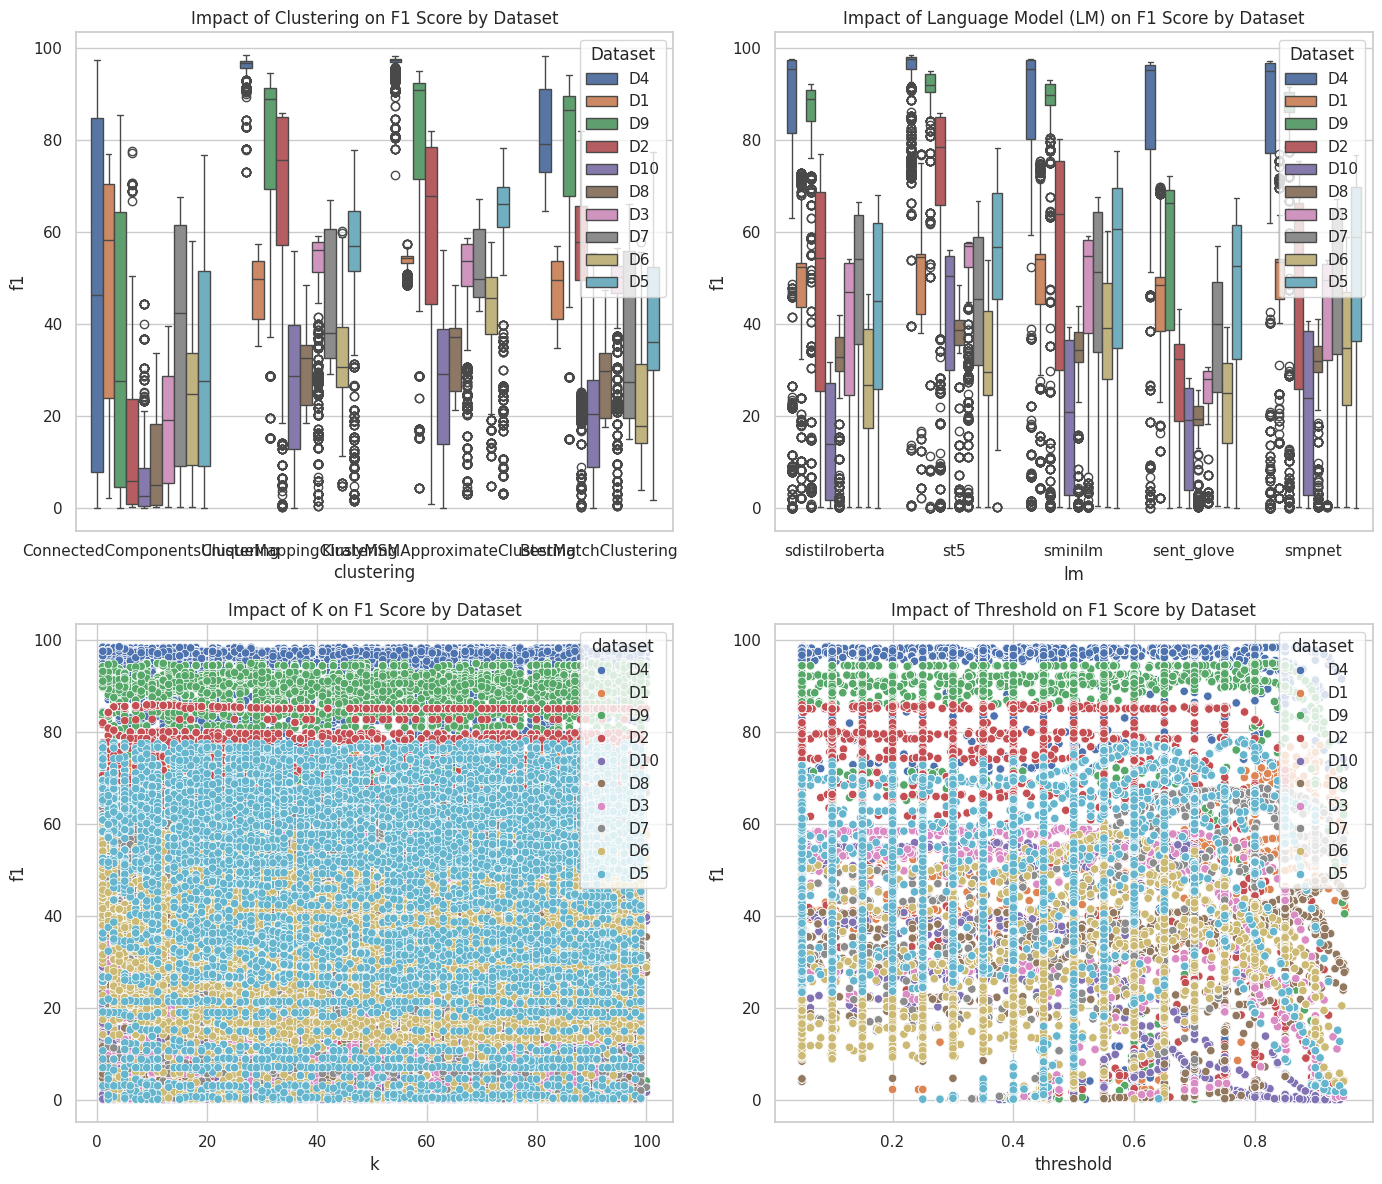

In [190]:

# Setting up the figure for plots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))  # Adjust the size as necessary

# Plotting box plots for categorical features 'clustering' and 'lm'
sns.boxplot(x='clustering', y='f1', hue='dataset', data=data, ax=axs[0, 0])
axs[0, 0].set_title('Impact of Clustering on F1 Score by Dataset')
axs[0, 0].legend(title='Dataset')

sns.boxplot(x='lm', y='f1', hue='dataset', data=data, ax=axs[0, 1])
axs[0, 1].set_title('Impact of Language Model (LM) on F1 Score by Dataset')
axs[0, 1].legend(title='Dataset')

# Plotting scatter plots for numerical features 'k' and 'threshold'
sns.scatterplot(x='k', y='f1', hue='dataset', data=data, ax=axs[1, 0])
axs[1, 0].set_title('Impact of K on F1 Score by Dataset')

sns.scatterplot(x='threshold', y='f1', hue='dataset', data=data, ax=axs[1, 1])
axs[1, 1].set_title('Impact of Threshold on F1 Score by Dataset')

# Enhancing layout
plt.tight_layout()
plt.show()

['D4' 'D1' 'D9' 'D2' 'D10' 'D8' 'D3' 'D7' 'D6' 'D5']
D1


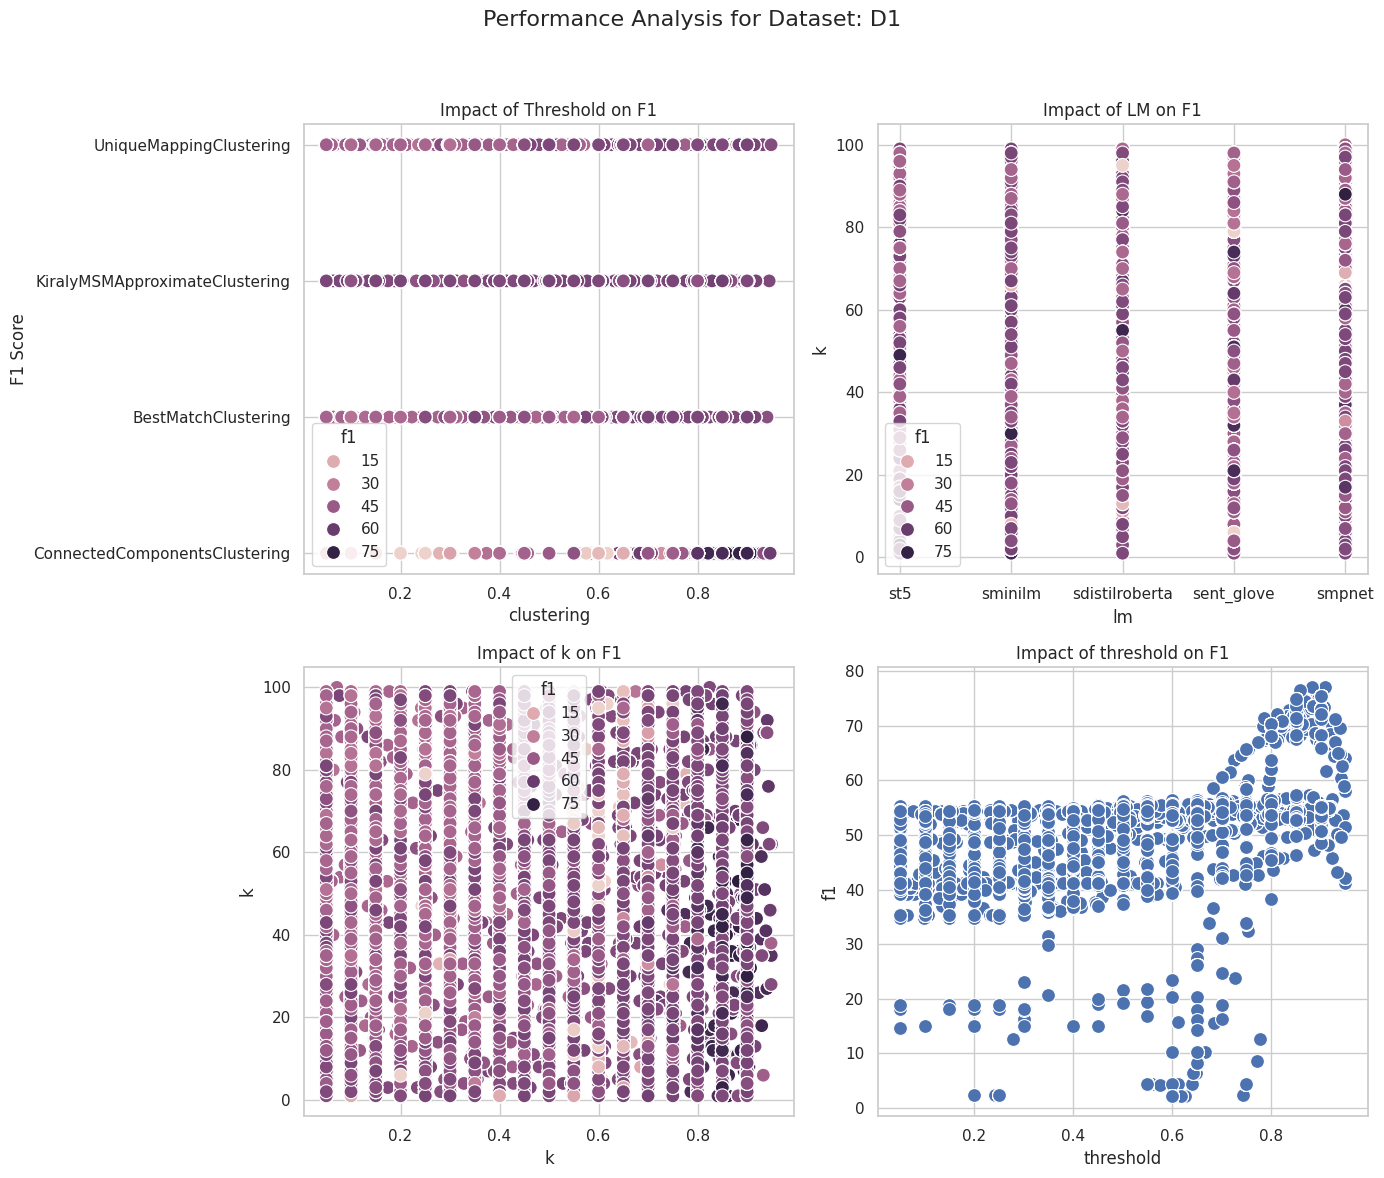

In [191]:
columns = ['f1', 'dataset', 'clustering', 'lm', 'k', 'threshold']
data = data[columns]

# Separate plots for each dataset
datasets = data['dataset'].unique()
print(datasets)
datasets = ['D1']
for dataset in datasets:
    print(dataset)
    fig, axs = plt.subplots(2, 2, figsize=(14, 12))
    fig.suptitle(f'Performance Analysis for Dataset: {dataset}', fontsize=16)

    # Filter data for the specific dataset
    subset = data[data['dataset'] == dataset]

    # Plotting for 'clustering'
    sns.scatterplot(x='threshold', y='clustering', hue='f1', data=subset, ax=axs[0, 0], s=100)
    axs[0, 0].set_title('Impact of Threshold on F1')
    axs[0, 0].set_xlabel('clustering')
    axs[0, 0].set_ylabel('F1 Score')
    # axs[0, 0].legend(title='Clustering')

    # Plotting for 'lm'
    sns.scatterplot(x='lm', y='k', hue='f1', data=subset, ax=axs[0, 1], s=100)
    axs[0, 1].set_title('Impact of LM on F1')
    axs[0, 1].set_xlabel('lm')
    # axs[0, 1].legend(title='LM')

    # Plotting for 'k'
    sns.scatterplot(x='threshold', y='k', hue='f1', data=subset, ax=axs[1, 0], s=100)
    axs[1, 0].set_title('Impact of k on F1')
    axs[1, 0].set_xlabel('k')
    # axs[1, 0].legend(title='k')

    # Plotting for 'thr'
    sns.scatterplot(x='threshold', y='f1', data=subset, ax=axs[1, 1], s=100)
    axs[1, 1].set_title('Impact of threshold on F1')
    axs[1, 1].set_xlabel('threshold')
    # axs[1, 1].legend(title='threshold')

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the title
    plt.show()

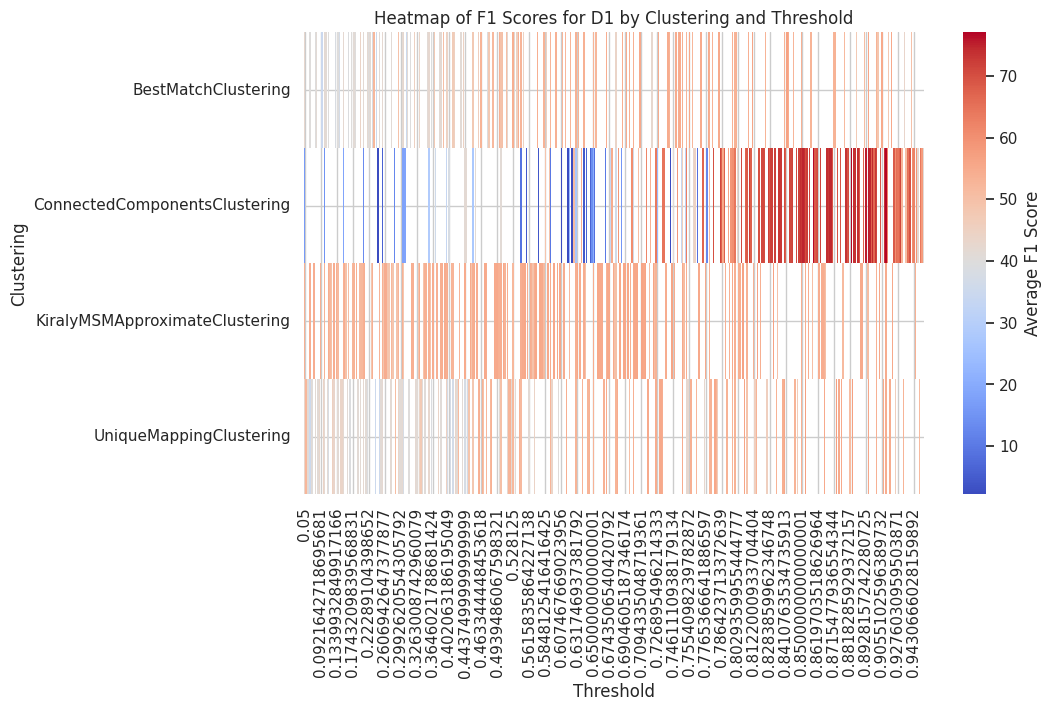

In [192]:
# Separate plots for each dataset
# datasets = data['dataset'].unique()
for dataset in datasets:
    # Filter data for the specific dataset
    subset = data[data['dataset'] == dataset]

    # Grouping and creating a pivot table
    pivot_data = subset.groupby(['clustering', 'threshold']).agg({'f1': 'mean'}).reset_index()
    pivot_table = pivot_data.pivot_table(index='clustering', columns='threshold', values='f1', aggfunc='mean')


    # Creating the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Average F1 Score'})
    plt.title(f'Heatmap of F1 Scores for {dataset} by Clustering and Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Clustering')
    plt.show()

# Threshold to categorical

In [193]:
# Transform threshold to categorical
step=0.05
data['threshold_categorical'] = pd.cut(data['threshold'], 
                                       bins=np.arange(0, 1.0+step, step),
                                       labels=[str(round(i,2))+"-"+str(round(i+step,2)) for i in np.arange(0, 1, step)])

In [194]:
data[['threshold_categorical', 'threshold']]

threshold_categorical  threshold
0                   0.55-0.6   0.557313
1                   0.0-0.05   0.050000
4                   0.7-0.75   0.725000
5                   0.55-0.6   0.557313
6                   0.0-0.05   0.050000
...                      ...        ...
130131              0.05-0.1   0.100000
130132              0.3-0.35   0.350000
130133              0.55-0.6   0.600000
130134              0.8-0.85   0.850000
130135              0.75-0.8   0.800000

[115640 rows x 2 columns]

In [196]:
data

f1 dataset                      clustering              lm   k  \
0        9.1806      D4   ConnectedComponentsClustering  sdistilroberta  23   
1       98.5122      D4         UniqueMappingClustering             st5   1   
4       97.4011      D4         UniqueMappingClustering         sminilm  25   
5        9.1806      D4   ConnectedComponentsClustering  sdistilroberta  23   
6       98.5122      D4         UniqueMappingClustering             st5   1   
...         ...     ...                             ...             ...  ..   
130131  69.6007      D5  KiralyMSMApproximateClustering         sminilm  86   
130132  28.8492      D5             BestMatchClustering      sent_glove  41   
130133  44.9186      D5   ConnectedComponentsClustering  sdistilroberta  30   
130134  26.7417      D5   ConnectedComponentsClustering         sminilm  84   
130135  18.8884      D5  KiralyMSMApproximateClustering  sdistilroberta  91   

        threshold threshold_categorical  
0        0.557313              0.55-0.6  
1        0.050000              0.0-0.05  
4        0.725000              0.7-0.75  
5        0.557313              0.55-0.6  
6        0.050000              0.0-0.05  
...           ...                   ...  
130131   0.100000              0.05-0.1  
130132   0.350000              0.3-0.35  
130133   0.600000              0.55-0.6  
130134   0.850000              0.8-0.85  
130135   0.800000              0.75-0.8  

[115640 rows x 7 columns]

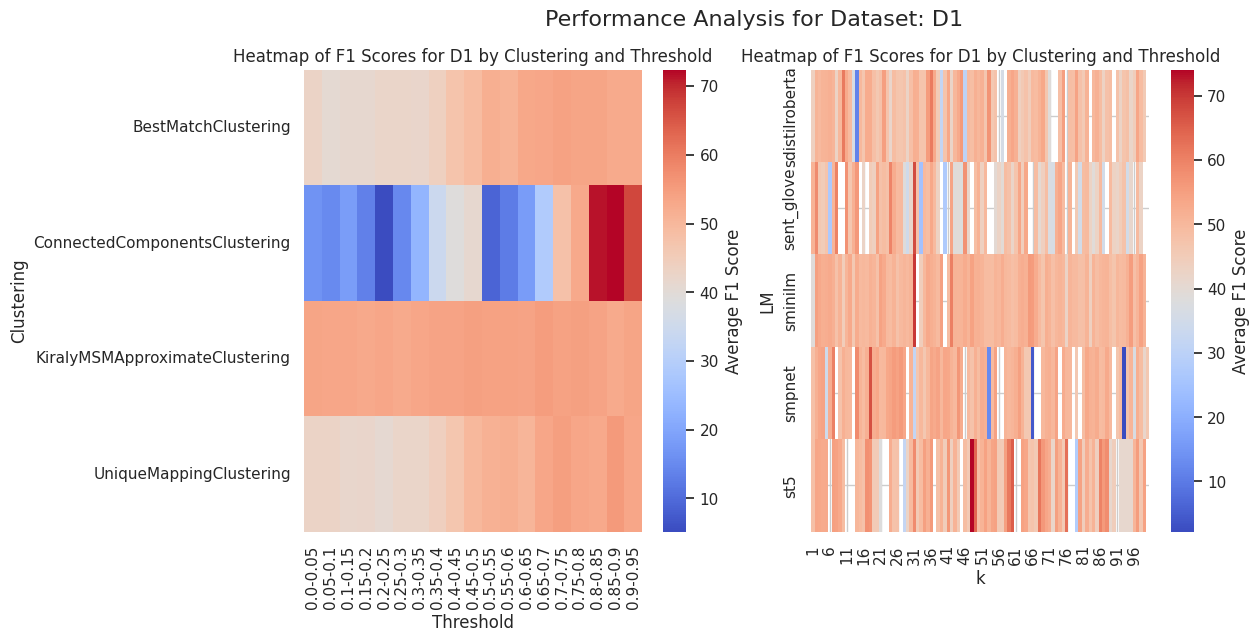

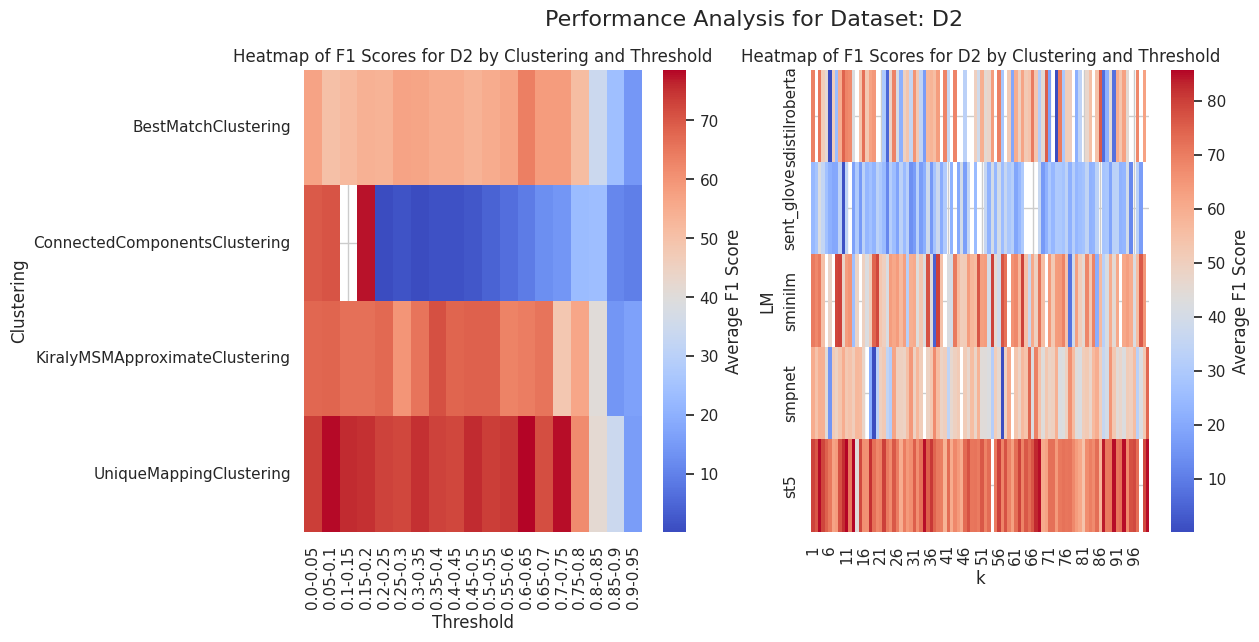

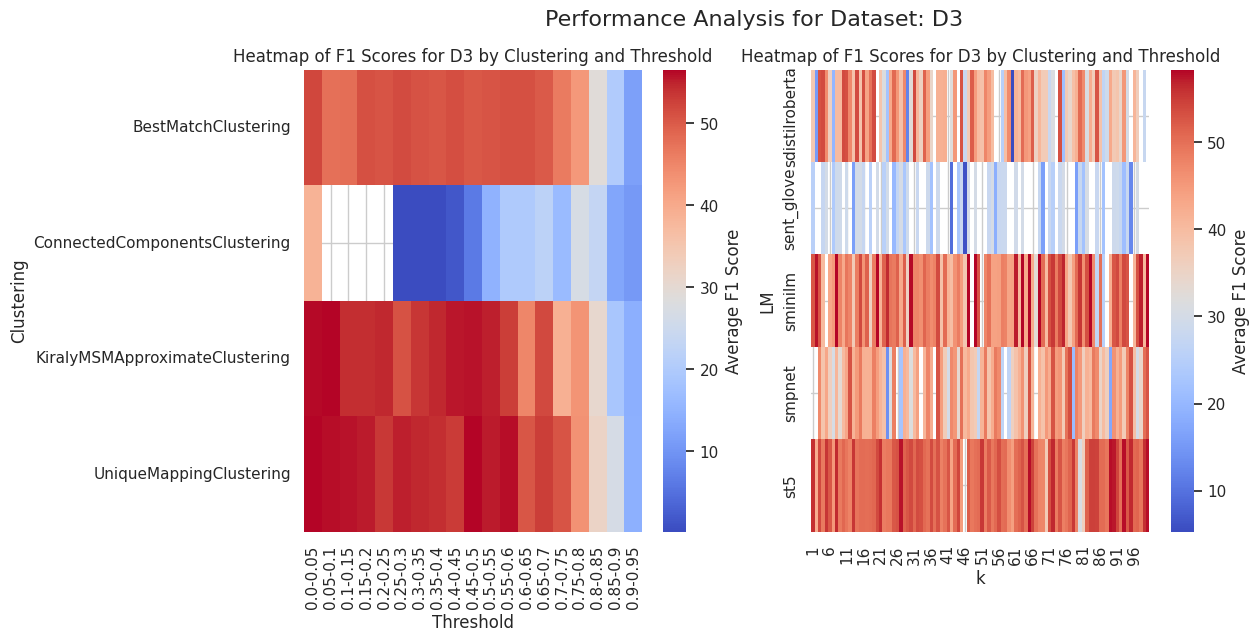

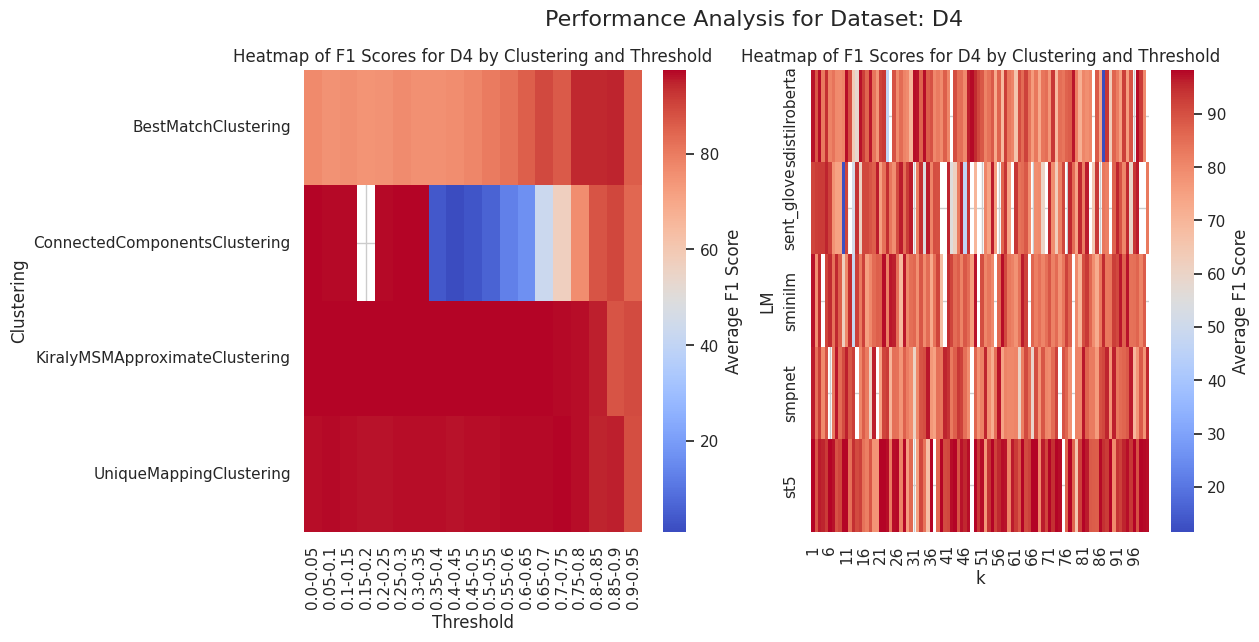

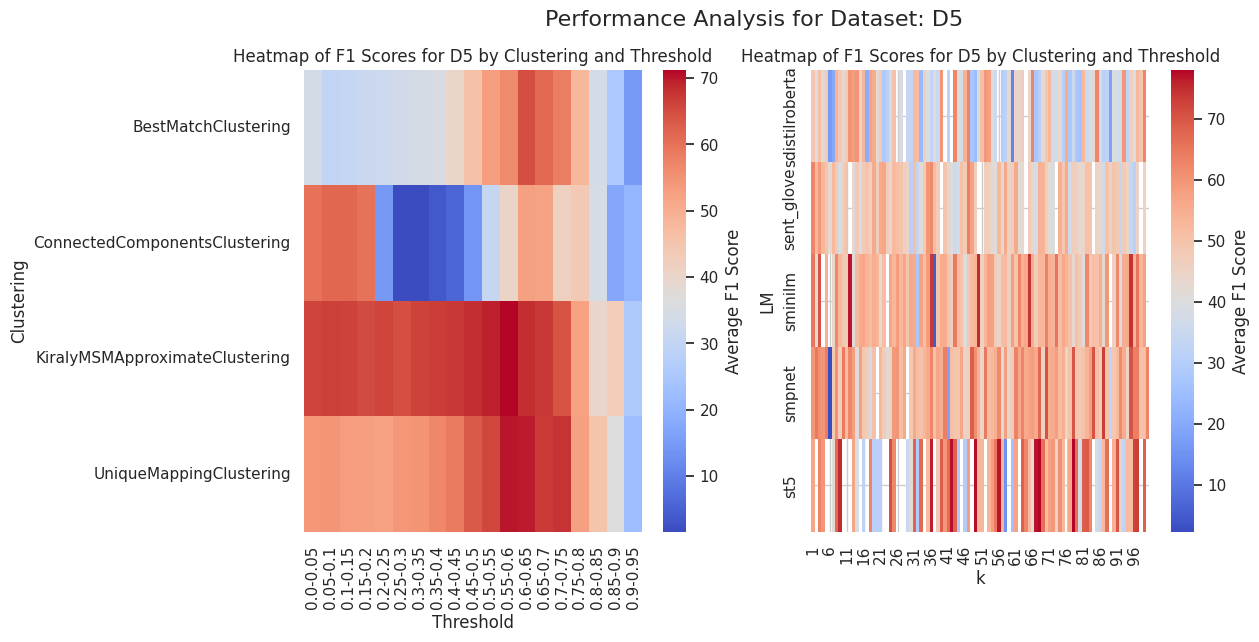

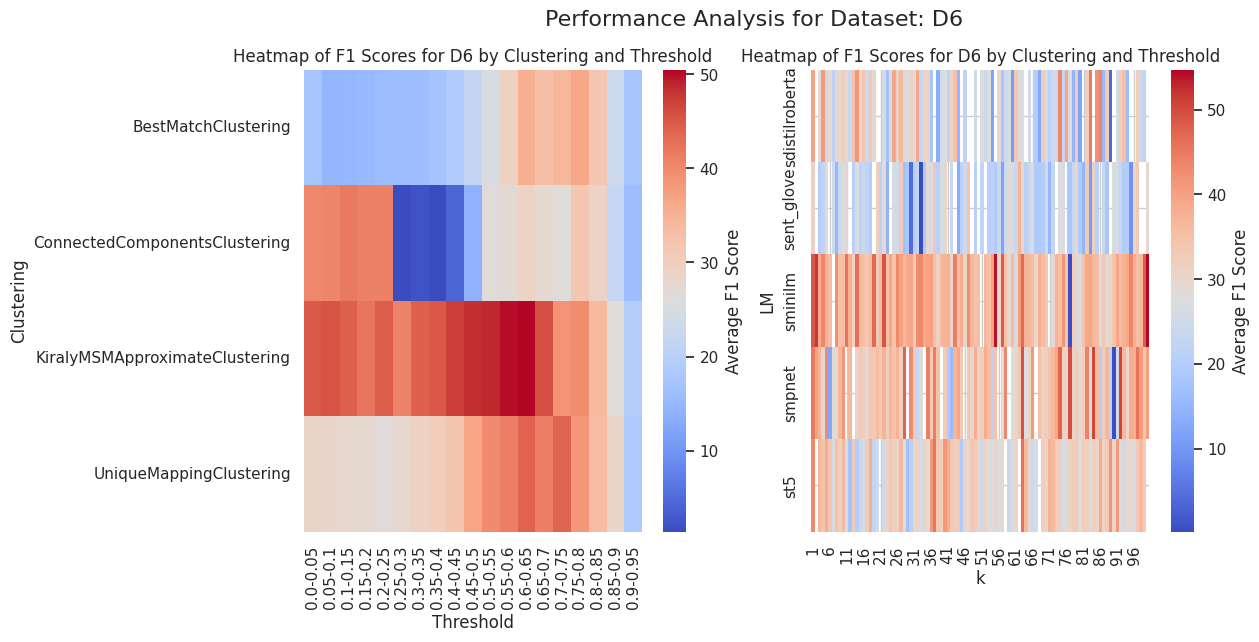

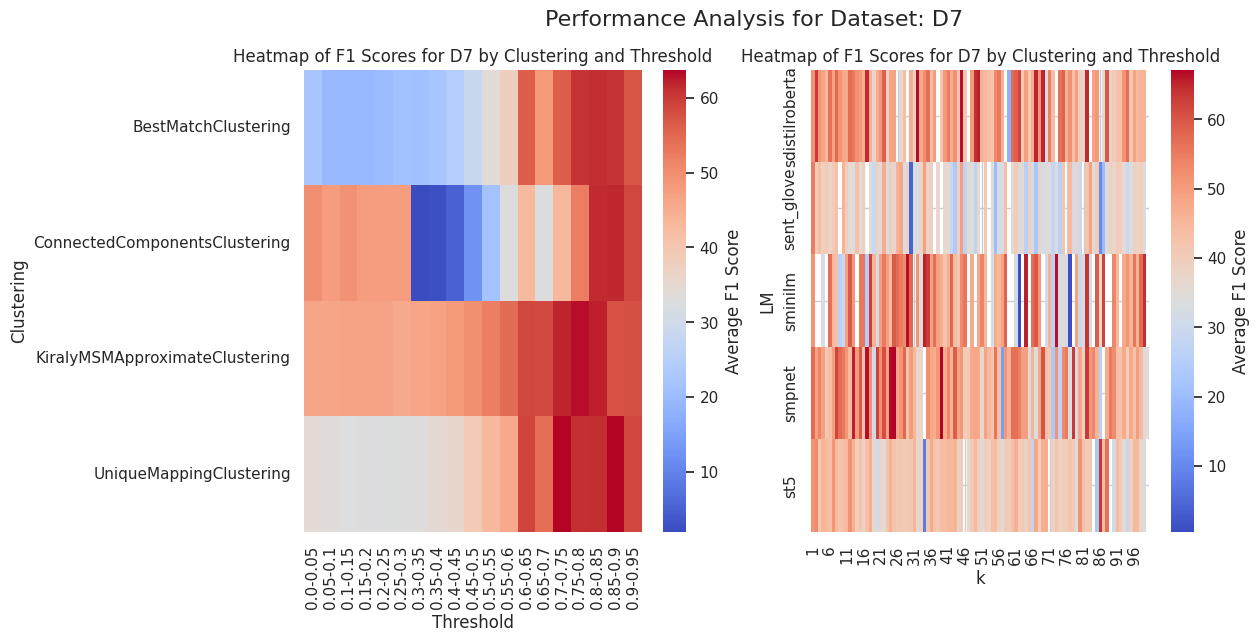

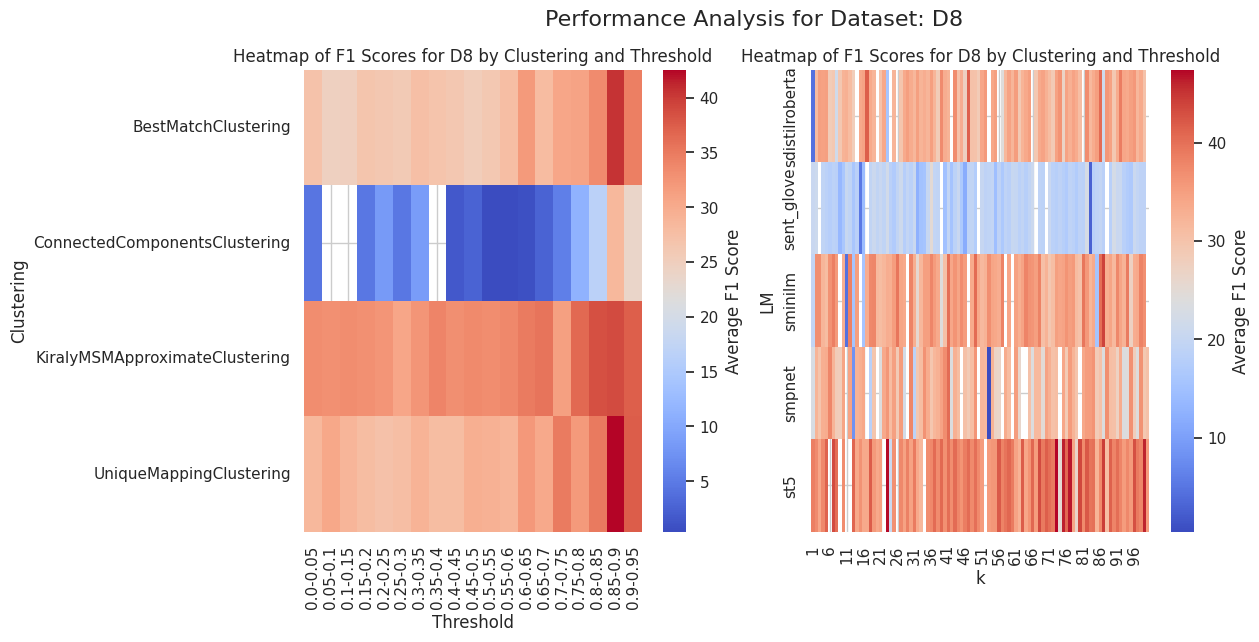

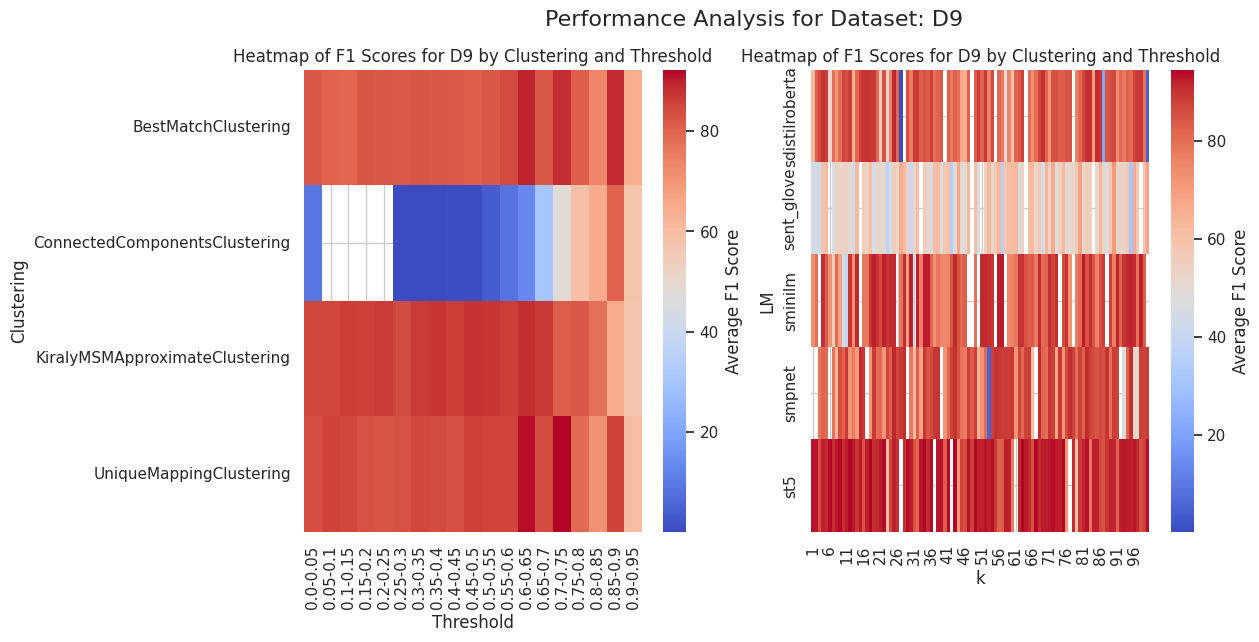

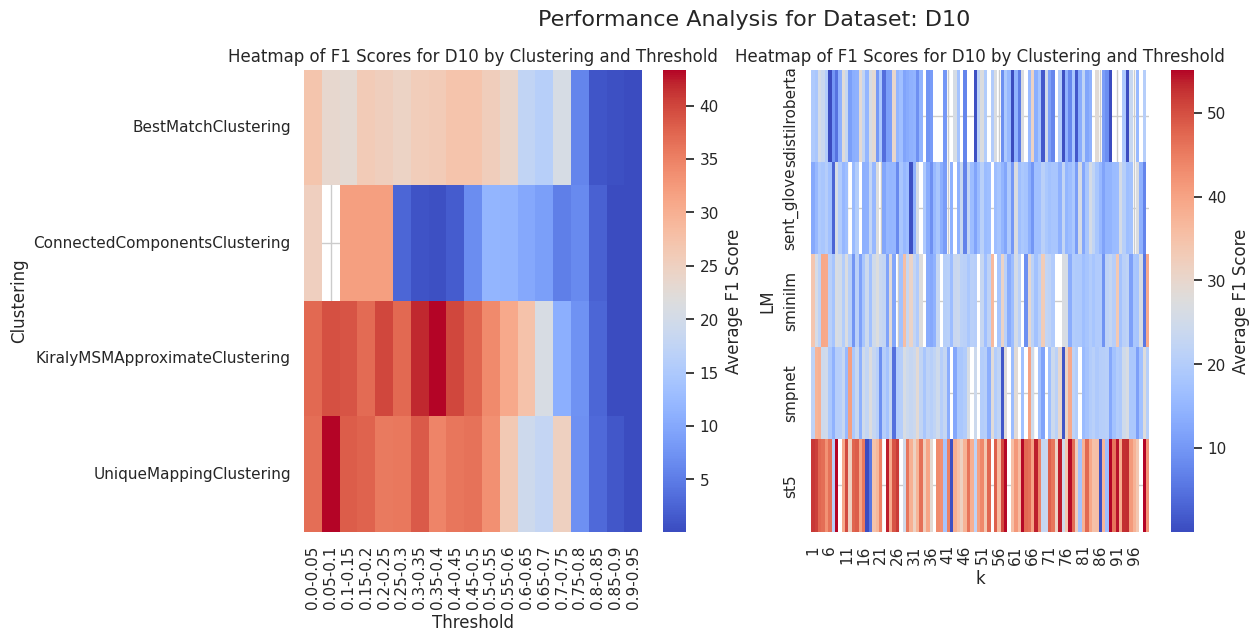

In [199]:
datasets = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6',  'D7',  'D8' , 'D9'   , 'D10']
# datasets = ['D1']
for dataset in datasets:
    # Filter data for the specific dataset
    subset = data[data['dataset'] == dataset]
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f'Performance Analysis for Dataset: {dataset}', fontsize=16)

    # Grouping and creating a pivot table
    pivot_data = subset.groupby(['clustering', 'threshold_categorical']).agg({'f1': 'mean'}).reset_index()
    pivot_table = pivot_data.pivot_table(index='clustering', columns='threshold_categorical', values='f1', aggfunc='mean')

    # Creating the heatmap
    sns.heatmap(pivot_table, fmt=".2f", cmap="coolwarm", ax=axs[0], cbar_kws={'label': 'Average F1 Score'})
    axs[0].set_title(f'Heatmap of F1 Scores for {dataset} by Clustering and Threshold')
    axs[0].set_xlabel('Threshold')
    axs[0].set_ylabel('Clustering')

    # Grouping and creating a pivot table
    pivot_data = subset.groupby(['lm', 'k']).agg({'f1': 'mean'}).reset_index()
    pivot_table = pivot_data.pivot_table(index='lm', columns='k', values='f1', aggfunc='mean')

    # Creating the heatmap
    sns.heatmap(pivot_table, fmt=".2f", cmap="coolwarm", ax=axs[1], cbar_kws={'label': 'Average F1 Score'})
    axs[1].set_title(f'Heatmap of F1 Scores for {dataset} by Clustering and Threshold')
    axs[1].set_xlabel('k')
    axs[1].set_ylabel('LM')

    plt.show()